# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [16]:
# Importar bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree # plot_tree para visualização
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay # Para avaliação do modelo
import matplotlib.pyplot as plt # Para plotar gráficos
import seaborn as sns # Para visualização aprimorada

# Carregar a base de dados tratada salva no exercício anterior
try:
    df = pd.read_csv('demo01_tratado.csv')
    print("Base de dados 'demo01_tratado.csv' carregada com sucesso!")
    print(f"Dimensões da base: {df.shape}")
    print("\nTipos de dados após carregamento:")
    print(df.dtypes)
    print("\nValores ausentes por coluna após carregamento:")
    print(df.isnull().sum())
    # Garantir que não há strings ou missings (já esperado do exercício anterior)
    # Se houver strings, você precisaria convertê-las para numéricas (dummies, por exemplo)
    # Se houver missings, você precisaria preenchê-los ou removê-los

    # Verificar se a coluna 'mau' existe e é numérica
    if 'mau' not in df.columns:
        print("ERRO: A coluna 'mau' não foi encontrada na base carregada.")
        exit()
    if df['mau'].dtype not in ['int64', 'float64']:
        print("AVISO: A coluna 'mau' não é numérica. Tentando converter para int.")
        try:
            df['mau'] = df['mau'].astype(int)
        except ValueError:
            print("ERRO: Não foi possível converter a coluna 'mau' para int. Verifique os dados.")
            exit()

except FileNotFoundError:
    print("ERRO: O arquivo 'demo01_tratado.csv' não foi encontrado.")
    print("Por favor, verifique se o arquivo foi salvo corretamente no exercício anterior ou se está no diretório certo.")
    exit()
except Exception as e:
    print(f"Ocorreu um erro ao carregar a base de dados: {e}")
    exit()

# Separar a variável resposta (y) e as variáveis explicativas (X)
y = df['mau'] # Variável resposta
X = df.drop('mau', axis=1) # Variáveis explicativas (todas as outras colunas)

print(f"\nDimensões de X (variáveis explicativas): {X.shape}")
print(f"Dimensões de y (variável resposta): {y.shape}")

# Dividir os dados em conjuntos de treino e teste (70% treino, 30% teste)
# random_state garante reprodutibilidade da divisão
# stratify=y garante que a proporção das classes de 'mau' seja mantida em ambos os conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nDivisão dos dados:")
print(f"X_train (treino - features): {X_train.shape}")
print(f"y_train (treino - resposta): {y_train.shape}")
print(f"X_test (teste - features): {X_test.shape}")
print(f"y_test (teste - resposta): {y_test.shape}")

Base de dados 'demo01_tratado.csv' carregada com sucesso!
Dimensões da base: (16650, 29)

Tipos de dados após carregamento:
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                         int64
sexo_M                                      int64
posse_de_veiculo_Y                          int64
posse_de_imovel_Y                           int64
tipo_renda_Pensioner                        int64
tipo_renda_State servant                    int64
tipo_renda_Student                          int64
tipo_renda_Working                          int64
educacao_Higher education                   int64
educacao_Incomplete higher

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento


Treinando o modelo de Árvore de Decisão...
Modelo treinado com sucesso!

Visualizando a Árvore de Decisão (pode demorar para renderizar e ser grande):


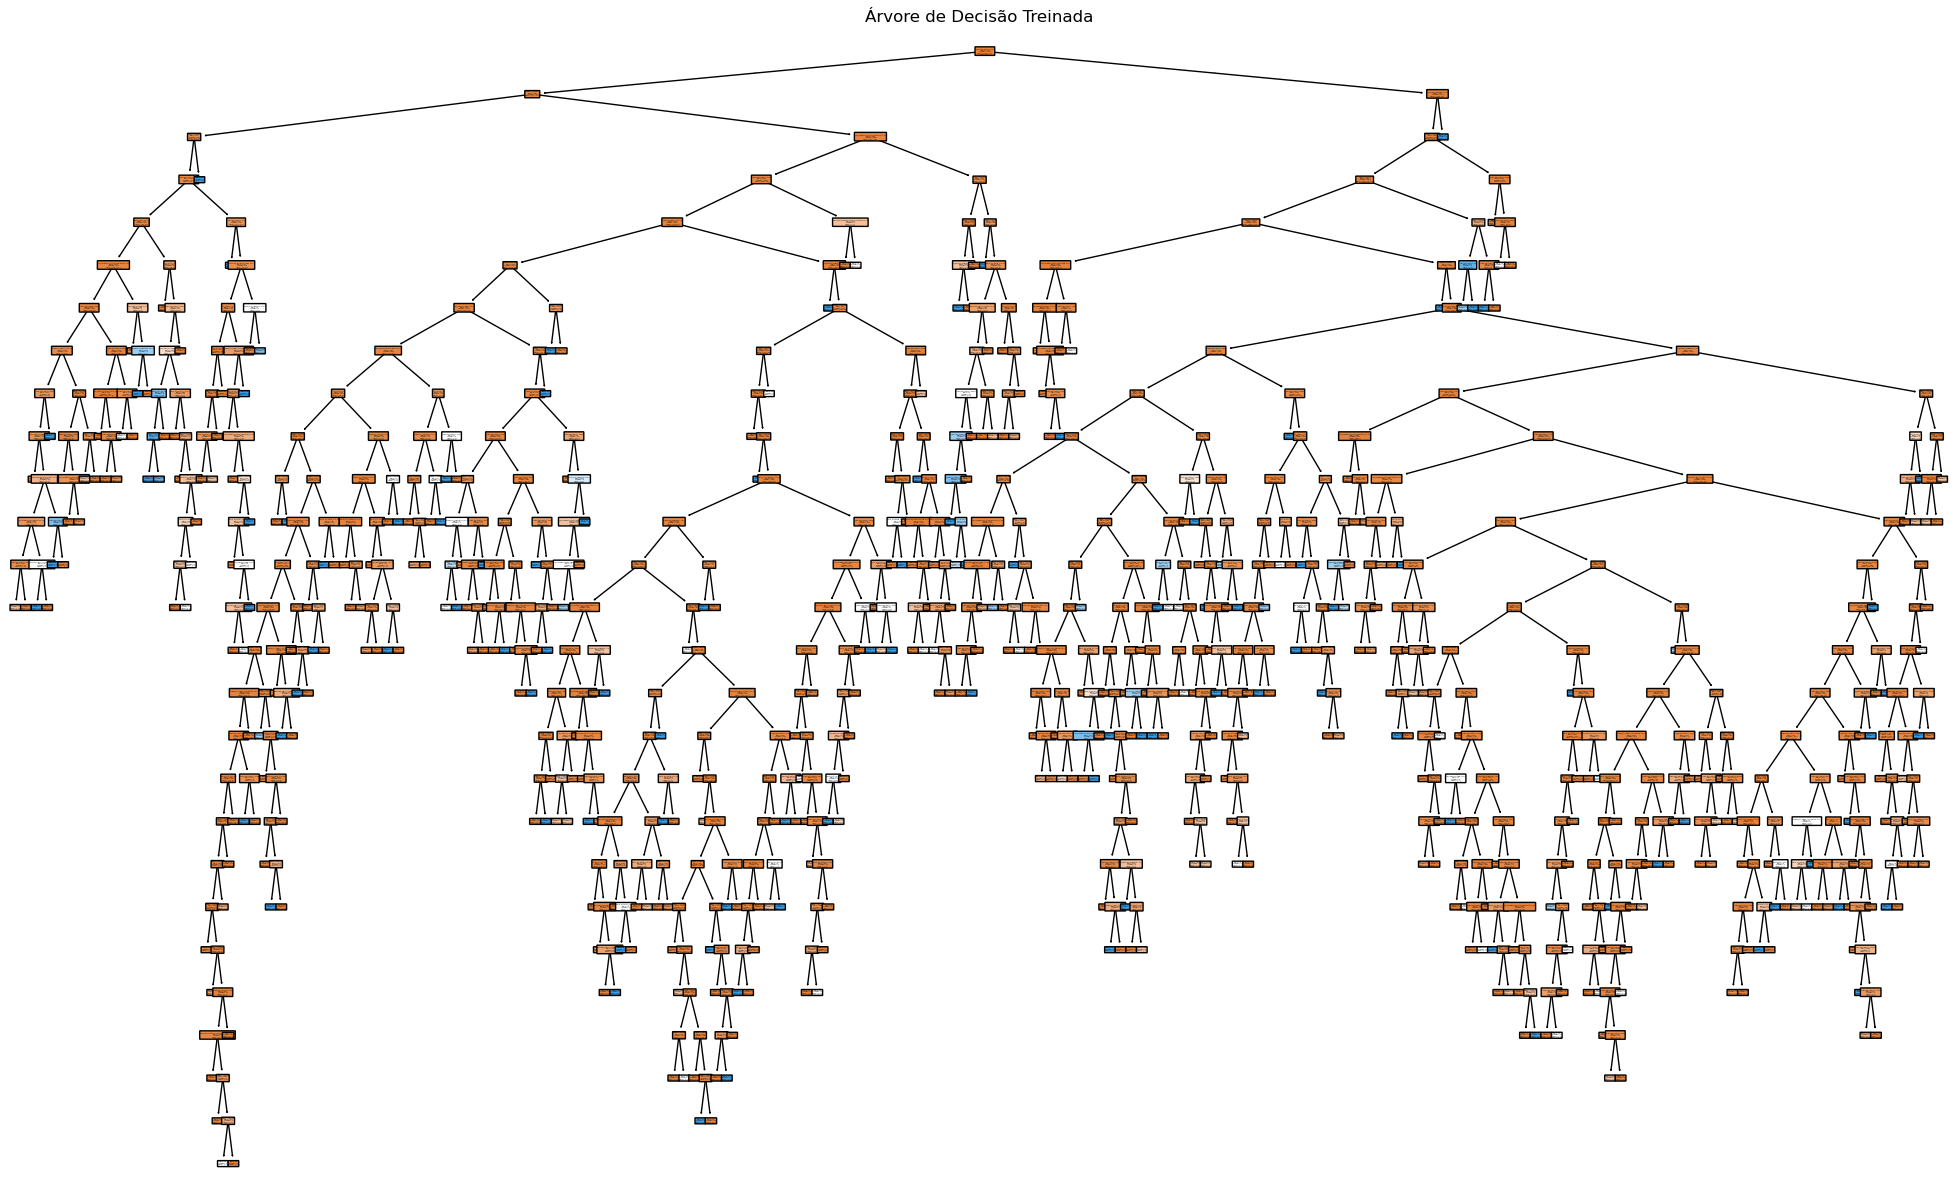


Matriz de Confusão na Base de Treinamento:


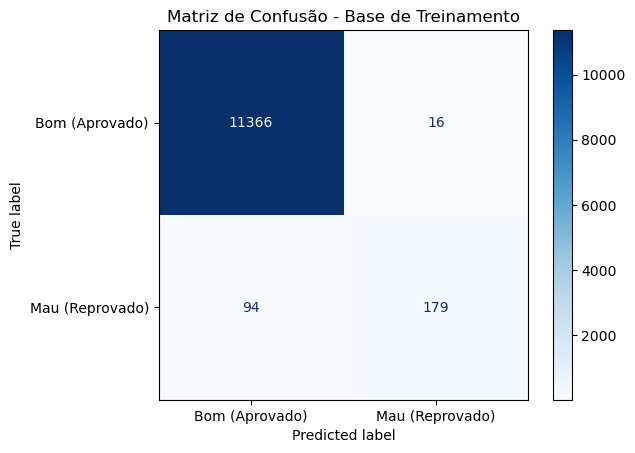


Acurácia na Base de Treinamento: 0.9906


In [20]:
# Definir um objeto com a função da árvore de decisão
# random_state é importante para resultados reproduzíveis
dt_model = DecisionTreeClassifier(random_state=42)

# Treinar o modelo com os dados de treinamento
print("\nTreinando o modelo de Árvore de Decisão...")
dt_model.fit(X_train, y_train)
print("Modelo treinado com sucesso!")

# Visualizar a árvore (pode ser grande, ajuste o figsize se necessário)
print("\nVisualizando a Árvore de Decisão (pode demorar para renderizar e ser grande):")
plt.figure(figsize=(25, 15)) # Ajuste o tamanho para melhor visualização
plot_tree(dt_model, filled=True, feature_names=X.columns.tolist(), class_names=['Bom', 'Mau'], rounded=True)
plt.title("Árvore de Decisão Treinada")
plt.show()

# Produzir uma visualização da matriz de classificação (matriz de confusão) - Base de Treinamento
y_pred_train = dt_model.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

print("\nMatriz de Confusão na Base de Treinamento:")
# Rótulos para a matriz: 0 (Bom) -> Aprovado, 1 (Mau) -> Reprovado
display_labels_map = {0: 'Bom (Aprovado)', 1: 'Mau (Reprovado)'}
# Obter os rótulos na ordem correta para ConfusionMatrixDisplay
labels_ordered = [display_labels_map[0], display_labels_map[1]]

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=labels_ordered)
disp_train.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusão - Base de Treinamento")
plt.show()

# Detalhamento da Matriz de Confusão:
# [TN FP]
# [FN TP]
# TN: Verdadeiros Negativos (Bons classificados como Bons) -> Aprovados corretamente
# FP: Falsos Positivos (Bons classificados como Maus) -> Aprovados indevidamente (classificados como Reprovados)
# FN: Falsos Negativos (Maus classificados como Bons) -> Reprovados indevidamente (classificados como Aprovados)
# TP: Verdadeiros Positivos (Maus classificados como Maus) -> Reprovados corretamente

# Calcular a acurácia na base de treinamento
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"\nAcurácia na Base de Treinamento: {accuracy_train:.4f}")

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?


Matriz de Confusão na Base de Teste:


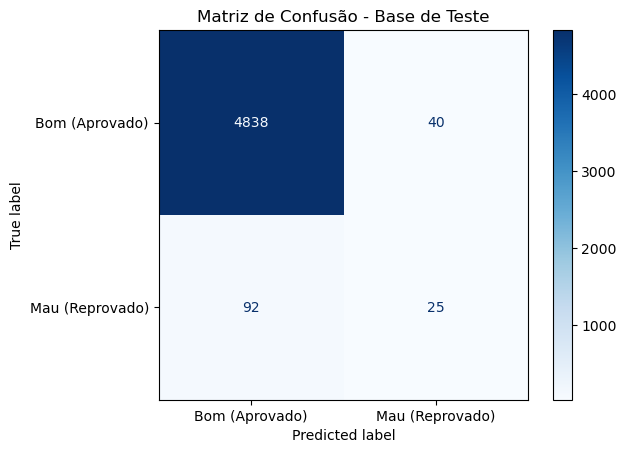

Acurácia na Base de Teste: 0.9736

Comparação de Acurácia:
Acurácia de Treino: 0.9906
Acurácia de Teste:  0.9736
O modelo pode estar sofrendo de overfit (sobreajuste), performando melhor nos dados de treino do que nos dados novos (teste).

Treinando uma nova árvore com min_samples_leaf=5 e max_depth=10...

Matriz de Confusão da Nova Árvore (min_samples_leaf=5, max_depth=10) na Base de Teste:


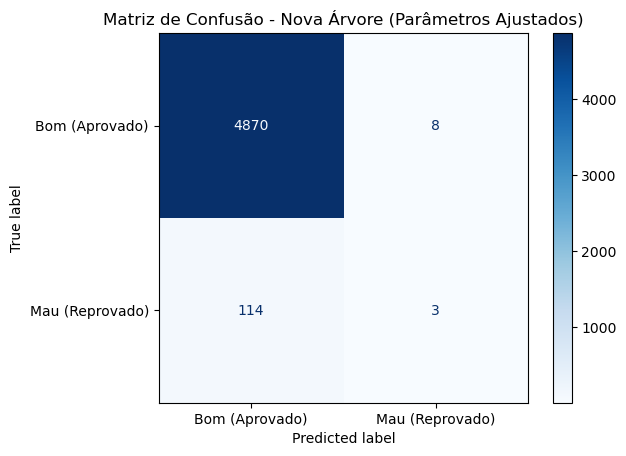


Distribuição da Predição na Base de Teste (Nova Árvore):
0    0.997798
1    0.002202
Name: proportion, dtype: float64
Proporção de proponentes classificados como 'maus' (1) pela nova árvore: 0.0022

Se todos os contratos fossem classificados como 'bons':
Número de proponentes verdadeiramente 'bons' na base de teste: 4878
Total de proponentes na base de teste: 4995
Acurácia esperada: 0.9766
Esta é uma acurácia de linha de base (baseline) para comparação.


In [21]:
# Classificar a base de teste de acordo com a árvore que você treinou
y_pred_test = dt_model.predict(X_test)

# Produzir a visualização da matriz de confusão para a base de teste
cm_test = confusion_matrix(y_test, y_pred_test)

print("\nMatriz de Confusão na Base de Teste:")
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=labels_ordered)
disp_test.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusão - Base de Teste")
plt.show()

# Calcular a acurácia da base de teste
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Acurácia na Base de Teste: {accuracy_test:.4f}")

# Comparar com a acurácia da base de treinamento
print(f"\nComparação de Acurácia:")
print(f"Acurácia de Treino: {accuracy_train:.4f}")
print(f"Acurácia de Teste:  {accuracy_test:.4f}")
if accuracy_train > accuracy_test:
    print("O modelo pode estar sofrendo de overfit (sobreajuste), performando melhor nos dados de treino do que nos dados novos (teste).")
elif accuracy_test > accuracy_train:
    print("A acurácia de teste é ligeiramente maior ou muito similar, o que é um bom sinal.")
else:
    print("A acurácia de treino e teste são iguais, o que é um bom sinal de generalização (mas raro para árvores de decisão sem restrições).")


# Treinar uma nova árvore com parâmetros específicos
print("\nTreinando uma nova árvore com min_samples_leaf=5 e max_depth=10...")
dt_model_new = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
dt_model_new.fit(X_train, y_train)

# Classificar a base de teste com a nova árvore
y_pred_new_test = dt_model_new.predict(X_test)

# Avaliar a matriz de classificação da nova árvore
cm_new_test = confusion_matrix(y_test, y_pred_new_test)
print("\nMatriz de Confusão da Nova Árvore (min_samples_leaf=5, max_depth=10) na Base de Teste:")
disp_new_test = ConfusionMatrixDisplay(confusion_matrix=cm_new_test, display_labels=labels_ordered)
disp_new_test.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusão - Nova Árvore (Parâmetros Ajustados)")
plt.show()

# Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
# Contar os valores 0 (Bons) e 1 (Maus) nas predições da nova árvore na base de teste
pred_distribution_new = pd.Series(y_pred_new_test).value_counts(normalize=True)
print("\nDistribuição da Predição na Base de Teste (Nova Árvore):")
print(pred_distribution_new)

if 1 in pred_distribution_new.index:
    prop_maus_new = pred_distribution_new[1]
    print(f"Proporção de proponentes classificados como 'maus' (1) pela nova árvore: {prop_maus_new:.4f}")
else:
    print("Nenhum proponente foi classificado como 'mau' (1) pela nova árvore.")

# Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?
# Isso significa que todas as previsões seriam 0.
# A acurácia seria a proporção de verdadeiros 'bons' (0) na base de teste.
total_test_samples = len(y_test)
true_bons_count = (y_test == 0).sum()
accuracy_all_bons = true_bons_count / total_test_samples

print(f"\nSe todos os contratos fossem classificados como 'bons':")
print(f"Número de proponentes verdadeiramente 'bons' na base de teste: {true_bons_count}")
print(f"Total de proponentes na base de teste: {total_test_samples}")
print(f"Acurácia esperada: {accuracy_all_bons:.4f}")
print("Esta é uma acurácia de linha de base (baseline) para comparação.")